<a href="https://colab.research.google.com/github/samade123/deep_learning_project/blob/main/Universal_adversarial_perturbations_by_Samuel_ademola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans
# !pip install progress
# load tqdm
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import cleverhans
keras.__version__
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas
# from progress.bar import Bar
from tqdm import tqdm_notebook as tqdm


print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=481000a62a17f3467ca9bb9153d9eccd66393db6ed291a06a3930bad0ebfed61
  Stored in directory: /tmp/pip-ephem-wheel-cache-i63l4ch_/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.

Tensorflow Version: 2.4.1
Cleverhans Version: 4.0.0-dda3ed9309fe3cd6d5b746c5c9c440d8
Instructions for u

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('conv_model.h5')

# Show the model architecture
new_model.summary()
# model = new_model

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 88)               

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist  # load dataset

(conv_train_images, conv_train_labels), (conv_test_images, conv_test_labels) = fashion_mnist.load_data()  # split into tetsing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training


conv_train_images = conv_train_images.reshape((60000, 28, 28, 1))
conv_train_images = conv_train_images.astype('float32') / 255

conv_test_images = conv_test_images.reshape((10000, 28, 28, 1))
conv_test_images = conv_test_images.astype('float32') / 255

In [ ]:

# def show_convoluted_image(img, label, guess):
#   plt.figure()
#   plt.imshow(img, cmap=plt.cm.binary)
#   plt.title("Expected: " + label)
#   plt.xlabel("Guess: " + guess)
#   plt.colorbar()
#   plt.grid(False)
#   plt.show()

def show_convoluted_image(original_image, original_label, guess, model_status=False, guessList=[], predictions=[]):
    #Show the image
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.figure()
    plt.grid(False)
    # original_label = class_names[original_label]
    # label = class_names[label]

    plt.imshow(np.reshape(original_image, (28,28)), cmap=plt.cm.binary)
    if model_status:
        guess = " "
    #     pred_label, pred_prob = top_k_predictions(img)
        # for label, prob in zip(pred_label, pred_prob):
        print( guessList)
        guessList = np.array(guessList)
        for label in guessList:
    #         print(f'{label}: {prob:0.1%}')
            print(label)
            guess = f'{class_names[label]} : {round(predictions[label]*100, 2)}%,  {guess} ' 
            # guess = f'{guess + class_names[label-1]} : {prob:0.1%}, ' 


    plt.title("Original Label: " + class_names[label])
    plt.xlabel("Model Prediction: {}".format(guess))
    # plt.xlabel("Original Label: " + class_names[label])
    plt.show() 


def predict(model, image, correct_label, num):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

#   print(prediction, predicted_class)
  image = conv_test_images[num]
  show_convoluted_image(image, class_names[correct_label], predicted_class)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

def select_number(num=0):
    return_val = False
    if num == 0:
        num = get_number()
        return_val = True
    image = conv_test_images[num]
    label = conv_test_labels[num]
    predict(new_model, image, label, num)
    if return_val:
        return num


# def random_predict(select_model):
#     num = get_number()
#     image = conv_test_images[num]
#     label = conv_test_images[num]
#     pred, predict_class = predict(select_model, image, label)
#     return pred, predict_class
# pred, predict_class = random_predict(model)
       

Pick a number: 280
[[9.99726355e-01 1.91269645e-09 4.22253543e-05 2.10081969e-04
  6.81578194e-06 9.69557941e-12 3.93678738e-06 6.26777727e-11
  1.06565785e-05 3.92492159e-12]] T-shirt/top
[2 3 0]
[2 3 0]
2
3
0


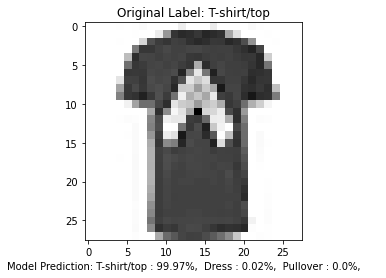

In [ ]:
# select_number()

def top_k_predictions(img, k=3):
  image_batch = tf.expand_dims(img, 0)
  predictions = model(image_batch)
  probs = tf.nn.softmax(predictions, axis=-1)
  top_probs, top_idxs = tf.math.top_k(input=probs, k=k)
  top_labels = test_labels[tuple(top_idxs)]


  return top_labels, top_probs[0]

import re
def truncate(num):
    return re.sub(r'^(\d+\.\d{,2})\d*$',r'\1',str(num))

# def show_image(img, label, guess, model_status=False, guessList=[], predictions=[]):
#   plt.figure()
#   plt.imshow(img, cmap=plt.cm.binary)
#   plt.title("Expected: " + label)
#   if model_status:
#     guess = " "
# #     pred_label, pred_prob = top_k_predictions(img)
#     # for label, prob in zip(pred_label, pred_prob):
#     print( guessList)
#     guessList = np.array(guessList)
#     for label in guessList:
# #         print(f'{label}: {prob:0.1%}')
#         print(label)
#         guess = f'{class_names[label]} : {round(predictions[label]*100, 2)}%,  {guess} ' 
#         # guess = f'{guess + class_names[label-1]} : {prob:0.1%}, ' 
#   plt.xlabel("Guess: " + guess)
#   plt.colorbar()
#   plt.grid(False)
#   plt.show()

def set_plot_color(color = 'white'):
  plt.rcParams['text.color'] = color
  plt.rcParams['axes.labelcolor'] = color
  ax = plt.axes()
  # Setting the background color
  ax.set_facecolor("grey")

  

def predict(model, image, correct_label, k=3):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = new_model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  print(prediction, predicted_class)
  guess = np.argpartition(prediction[0], -k)[-k:] 
  prediction[0][guess]
  guess[np.argsort(prediction[0][guess])]
#   guess = prediction[0].argsort()[-k:][::-1]
  print(guess)

  show_convoluted_image(image, class_names[correct_label], predicted_class, True, guess, prediction[0])
# def show_convoluted_image(original_image, original_label, guess, model_status=False, guessList=[], predictions=[]):
#
  return prediction, predicted_class  

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

def random_predict(select_model):
    num = get_number()
    image = conv_test_images[num]
    label = test_labels[num]
    pred, predict_class = predict(select_model, image, label)
    return pred, predict_class
# pred, predict_class = random_predict(model)
pred, predict_class = random_predict(new_model)

#Part 2: The Fast Gradient Method (FGM)

In [ ]:
# Import the attack
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(new_model.input,new_model.layers[-1].output)

In [ ]:
def fsgm(index, original_image,  epsilon = 0.03, verbose_log = False):
    # original_image = conv_train_images[index]
    original_image = tf.convert_to_tensor(original_image.reshape((28,28,1))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
    original_image = np.expand_dims(original_image, axis=0)

    original_label = train_labels[index]
    original_label = np.reshape(original_label, (1,)).astype('int64') # Give label proper shape and type for cleverhans
    if verbose_log == True:
        select_number(index)
        show_convoluted_image(original_image, original_label[0], original_label[0])
    

    adv_example_untargeted_label = fast_gradient_method(logits_model, original_image, epsilon, np.inf, targeted=False)

    adv_example_untargeted_label_pred = new_model.predict(adv_example_untargeted_label)

    return adv_example_untargeted_label, adv_example_untargeted_label_pred

def get_pertubation(original_image, adv_example_untargeted_label):
    pertubation = original_image - adv_example_untargeted_label
    return pertubation

def get_max_prediction(model_predicition):
    return model_predicition[0][np.argmax(model_predicition)]   

def is_new_iamge_fooled(adv_prediction, prediction_old, fooling_rate, verbose_log = False):
    if verbose_log == True:
        print("fooling_rate", fooling_rate)
        print("adverse Image prediction: " , np.argmax(adv_prediction) , "val: ", np.max(adv_prediction)  ,", origiinal Image prediction: ", np.argmax(prediction_old), "val: ", np.max(prediction_old),  ", prediction accuracy greater than fooling rate: ", get_max_prediction(adv_prediction) > fooling_rate )
        class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        # table = pandas.DataFrame(adv_prediction.transpose(), class_names, ['old'])
        # prediction_old = new_model.predict(original_image)
        new_data = np.concatenate((adv_prediction, prediction_old))
        table = pandas.DataFrame(new_data.transpose(), class_names, ['new', 'old'])
        print(table)
        print(np.max(adv_prediction/np.sum(adv_prediction))*100)
        print("are max index the same", (np.argmax(adv_prediction) != np.argmax(prediction_old), ", higher than foolng rte", get_max_prediction(adv_prediction) > fooling_rate ))
        print("is the adverse Image foolwortgy: ", (np.argmax(adv_prediction) != np.argmax(prediction_old)) and (get_max_prediction(adv_prediction) > fooling_rate ))
        table.to_csv('data.csv')
    return ((np.argmax(adv_prediction) != np.argmax(prediction_old)) and (get_max_prediction(adv_prediction) > fooling_rate ))  

def minimum_fsgm(fooling_rate, original_image, random_index, verbose_log=False):
    prediction_old = new_model.predict(original_image)

    a_adv_pred = prediction_old
    x_adv = original_image
    # x_adv, a_adv_pred = fsgm(random_index)
    itr = 2
    max_attempts = 20
    epislon_steps = 0.01
    # current_fooling_rate = 0
    # while 

    # if first_image == True:
        # while ((np.argmax(a_adv_pred) == np.argmax(prediction_old)) or (get_max_prediction(a_adv_pred) < fooling_rate )):
    status = True
    if verbose_log:
        print("does while statement run", is_new_iamge_fooled(a_adv_pred, prediction_old, fooling_rate, False))
    while is_new_iamge_fooled(a_adv_pred, prediction_old, fooling_rate, False) == False:
        itr+= 1
        if verbose_log:
            print(itr , epislon_steps*itr, is_new_iamge_fooled(a_adv_pred, prediction_old, fooling_rate))
        x_adv, a_adv_pred = fsgm(random_index, original_image, epislon_steps*itr)
        if itr > max_attempts: 
            status = False
            break

    pertubation = get_pertubation(original_image, x_adv)
    return pertubation, status


def create_universerial_pertubations(loops = 10, fooling_rate=0.5, verbose_log =False):
    image_index = 0
    # fooling_rate = 0.9
    pbar = tqdm(total=loops)

    while image_index < loops:
        random_index = np.random.randint(train_images.shape[0])
        original_image = conv_train_images[random_index]
        original_image = tf.convert_to_tensor(original_image.reshape((28,28,1))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
        original_image = np.expand_dims(original_image, axis=0)
        # original_label = class_names[train_labels[random_index][0]]

        prediction_old = new_model.predict(original_image)
        # print("first_image")
        first_image = (image_index == 0)
        # current_pertubation = minimum_fsgm(fooling_rate, first_image)
        if first_image == True:
            current_pertubation, status = minimum_fsgm(fooling_rate, original_image, random_index) #fix minimum fgsm function
            show_convoluted_image(current_pertubation, original_label[0], original_label[0])

            universal_pertubation = current_pertubation
        else:
            pertubated_img = original_image + universal_pertubation
            prediction_old = new_model.predict(original_image)
            predicion_pertubated = new_model.predict(pertubated_img)
            if is_new_iamge_fooled(predicion_pertubated, prediction_old, fooling_rate, verbose_log):
                # image_index+= 1
                if verbose_log:
                    print("image is fooled", image_index)
                # loops+= 1
                
            else: 
                current_pertubation, status = minimum_fsgm(fooling_rate, original_image, random_index)
                if verbose_log:
                    print("image is being pertubated", image_index)
                # attempt 1 - queit but not adverserial
                # difference_pert =universal_pertubation - current_pertubation
                # universal_pertubation = difference_pert - universal_pertubation

                # attempt 2 - works but the pertubation is not qiuet
                # difference_pert = np.abs(current_pertubation - universal_pertubation)
                # universal_pertubation = universal_pertubation + difference_pert

                # attempt 3 - works but the pertubation is not qiuet
                # difference_pert = np.abs(universal_pertubation - current_pertubation)
                # universal_pertubation = universal_pertubation + difference_pert

                # difference_pert =  current_pertubation - universal_pertubation
                # universal_pertubation = universal_pertubation + difference_pert

                # attempt 4 - not yet tested
                # difference_pert = np.abs(universal_pertubation - current_pertubation)
                # universal_pertubation = np.abs(difference_pert - universal_pertubation)

                 # attempt 4 - not yet tested
                # difference_pert = universal_pertubation - current_pertubation
                # universal_pertubation = np.abs(universal_pertubation - difference_pert)

                # universal_pertubation = universal_pertubation + current_pertubation
               
                universal_pertubation =np.abs(universal_pertubation - current_pertubation)

                # universal_pertubation =np.abs(current_pertubation - universal_pertubation)

                if verbose_log:
                    # show_convoluted_image(difference_pert, original_label[0], original_label[0])
                    # show_convoluted_image(pertubated_img, original_label[0], original_label[0])
                    show_convoluted_image(current_pertubation, original_label[0], original_label[0])
                    show_convoluted_image(universal_pertubation, original_label[0], original_label[0])

                # image_index+= 1


        if status == True:
            image_index+= 1
            pbar.update(1)
    pbar.close()
    # if verbose_log:
    show_convoluted_image(universal_pertubation, original_label[0], original_label[0])
    return universal_pertubation

In [ ]:
random_index = np.random.randint(train_images.shape[0])

original_image = conv_train_images[random_index]
original_image = tf.convert_to_tensor(original_image.reshape((28,28,1))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
original_image = np.expand_dims(original_image, axis=0)
prediction_old = new_model.predict(original_image)
original_label = train_labels[random_index]
original_label = np.reshape(original_label, (1,)).astype('int64') # Give label proper shape and type for cleverhans

# #Show the image
# plt.figure()
# plt.grid(False)

# plt.imshow(np.reshape(original_image, (28,28)))
# plt.title("Label: {}".format(original_label[0]))

# plt.show()
# select_number(random_index)
show_convoluted_image(original_image, original_label[0], original_label[0])

### Non-targeted FGSM attack


In [ ]:
epsilon = 0.05

adv_example_untargeted_label = fast_gradient_method(logits_model, original_image, epsilon, np.inf, targeted=False)

adv_example_untargeted_label_pred = new_model.predict(adv_example_untargeted_label)

# #Show the image
# plt.figure()
# plt.grid(False)

# plt.imshow(np.reshape(adv_example_untargeted_label, (28,28)))
# plt.title("Model Prediction: {}".format(np.argmax(adv_example_untargeted_label_pred)))
# plt.xlabel("Original Label: {}".format(original_label[0]))

# plt.show()
# print("Prediction", adv_example_untargeted_label_pred)
show_convoluted_image(adv_example_untargeted_label, original_label[0], np.argmax(adv_example_untargeted_label_pred))

In [ ]:
pertubation = original_image - adv_example_untargeted_label
# #Show the image
# plt.figure()
# plt.grid(False)

# plt.imshow(np.reshape(pertubation, (28,28)))
# plt.title("Model Prediction: {}".format(np.argmax(adv_example_untargeted_label_pred)))
# plt.xlabel("Original Label: {}".format(original_label[0]))

# plt.show()
show_convoluted_image(pertubation, original_label[0], np.argmax(adv_example_untargeted_label_pred))


In [ ]:
# is_new_iamge_fooled(adv_example_untargeted_label_pred, prediction_old, 0.6, True) 

In [ ]:
 y, r = minimum_fsgm(0.8, original_image, random_index, True)
 print(r)
 pertubed = original_image + y
show_convoluted_image(y, original_label[0], np.argmax(adv_example_untargeted_label_pred))
show_convoluted_image(pertubed, original_label[0], np.argmax(adv_example_untargeted_label_pred))
pertubed_min_pred = new_model.predict(pertubed)


is_new_iamge_fooled(pertubed_min_pred, prediction_old, 0.4, True) 

In [ ]:
universal = create_universerial_pertubations(50, 0.1, False)

In [ ]:
def test_universal(universal):
    random_index = np.random.randint(test_images.shape[0])
    original_image = conv_test_images[random_index]
    original_image = tf.convert_to_tensor(original_image.reshape((28,28,1))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
    original_image = np.expand_dims(original_image, axis=0)
    original_label = test_labels[random_index]
    original_label = np.reshape(original_label, (1,)).astype('int64') # Give label proper shape and type for cleverhans

    new_image = original_image + universal

    prediction_old = new_model.predict(original_image)
    prediction_new = new_model.predict(new_image)

    is_new_iamge_fooled(prediction_new, prediction_old, 0.4, True)
    show_convoluted_image(new_image, original_label[0], np.argmax(prediction_new))
    show_convoluted_image(original_image, original_label[0], np.argmax(prediction_old))


test_universal(universal)


# Debugging errors

In [ ]:
old_images = conv_test_images
# for x in conv_test_images:
#     # image = x
#     # image = image + universal
#     # show_convoluted_image(image, original_label[0], np.argmax(prediction_old))
#     x = x + universal
#     # show_convoluted_image(x, original_label[0], np.argmax(prediction_old))
loops = 1000
fooled = 0
pbar = tqdm(total=loops)
for x in range(loops):
    original_image = conv_test_images[x] + universal
    old_image = old_images[x]

    original_image = tf.convert_to_tensor(original_image.reshape((28,28,1))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
    original_image = np.expand_dims(original_image, axis=0)

    old_image = tf.convert_to_tensor(old_image.reshape((28,28,1))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor
    old_image = np.expand_dims(old_image, axis=0)

    new_predict = new_model.predict(original_image)
    old_predict = new_model.predict(old_image)
    # print(np.argmax(old_predict), np.argmax(new_predict))
    # show_convoluted_image(original_image, original_label[0], np.argmax(prediction_old))
    # show_convoluted_image(old_image, original_label[0], np.argmax(prediction_old))
    if np.argmax(old_predict) != np.argmax(new_predict):
        fooled+= 1
        # print("fooled",fooled)
    pbar.update(1)


test_loss, test_acc = new_model.evaluate(conv_test_images,  test_labels, verbose=1)
pbar.close()
# show_convoluted_image(noise[60], original_label[0], np.argmax(prediction_old))
# show_convoluted_image(test_images[34], original_label[0], np.argmax(prediction_old))
print(test_loss, test_acc)
print("fooled: ",fooled)



In [ ]:
from __future__ import print_function

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

valid_imshow_data(conv_test_images[3])


If the code above returns false then there is something likely wrong with the image data 